# Library

In [1]:
import HAVdb as HAV
from HAVdb import importer 
import matplotlib.pyplot as plt
import numpy as np

# Parameters selection

In [2]:
# The HAVdb module is a collection of functions and variables that can be used to interact with the HAV database.
print("Dataset path (relative to the current working directory): ", HAV.path)
print("Number of participants: ", len(HAV.users), "Participants ", HAV.users)
print("Number of textures: ", len(HAV.textures), "Textures ", HAV.textures)
print("Number of trials (per texture per participant): ", len(HAV.trials), "Trials ", HAV.trials)
print("Number of data sources: ", len(HAV.streams), "Data sources ", HAV.streams)


# Variables
path = HAV.path
sampling_rate = 12000

# Select a user, texture, and trial to visualise
user = HAV.users[0]
texture = HAV.textures[1]
trial = HAV.trials[0]

print("\nParameters Selected:")
print("User: ", user)
print("Texture: ", texture)
print("Trial: ", trial)

Dataset path (relative to the current working directory):  ../datah5/
Number of participants:  10 Participants  ['subject_0', 'subject_1', 'subject_2', 'subject_3', 'subject_4', 'subject_5', 'subject_6', 'subject_7', 'subject_8', 'subject_9']
Number of textures:  10 Textures  ['7t', '10t', '18t', '39t', '44t', '54t', '59t', '83t', '108t', '120t']
Number of trials (per texture per participant):  5 Trials  ['std_0', 'std_1', 'std_2', 'cte_force_3', 'cte_speed_4']
Number of data sources:  3 Data sources  ['kistler', 'ft_sensor', 'positions']

Parameters Selected:
User:  subject_0
Texture:  10t
Trial:  std_0


## Raw Data

In [3]:
# Import the data
data = HAV.importer.get_data(path, user, texture, trial)
[time_kistler, kistler_data], [time_pos, pos_data], [time_ft_sensor, ft_sensor_data] = (
    data
)
print("\nData Imported:")
print("Kistler data: ", kistler_data.shape)
print("Position data: ", pos_data.shape)
print("FT Sensor data: ", ft_sensor_data.shape)



Data Imported:
Kistler data:  (641024, 4)
Position data:  (1804, 4)
FT Sensor data:  (587809, 6)


### Position

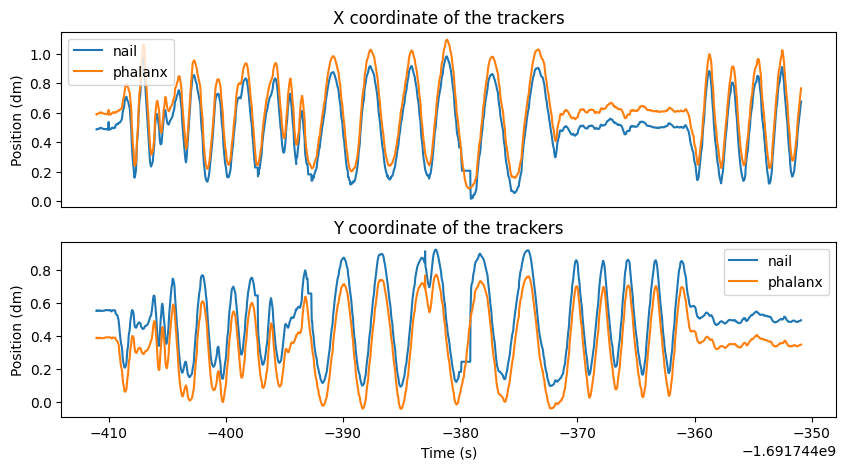

Text(0.5, 1.0, 'Position of the trackers')

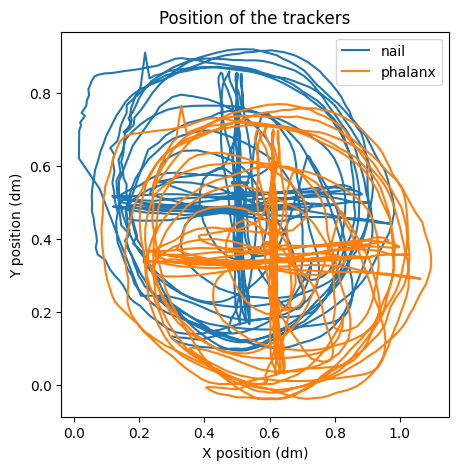

In [4]:
acc_pos = ["nail", "phalanx"]
axis = ["X", "Y"]

# Plot the position data
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
for i in range(4):
    ax = axs[i%2]
    ax.plot(time_pos, pos_data[:, i], label= acc_pos[i//2])
    ax.set_title(axis[i%2]+" coordinate of the trackers")
    ax.set_ylabel("Position (dm)")

#remove the x axis of
axs[0].set_xticks([])
axs[0].legend()
axs[1].set_xlabel("Time (s)")
axs[1].legend()
plt.show()
    
fig = plt.figure(figsize=(5, 5))
plt.plot(pos_data[:, 0], pos_data[:, 1], label="nail")
plt.plot(pos_data[:, 2], pos_data[:, 3], label="phalanx")
plt.xlabel("X position (dm)")
plt.ylabel("Y position (dm)")
plt.legend()
plt.title("Position of the trackers")
    
    

### Kistler (force/torque)

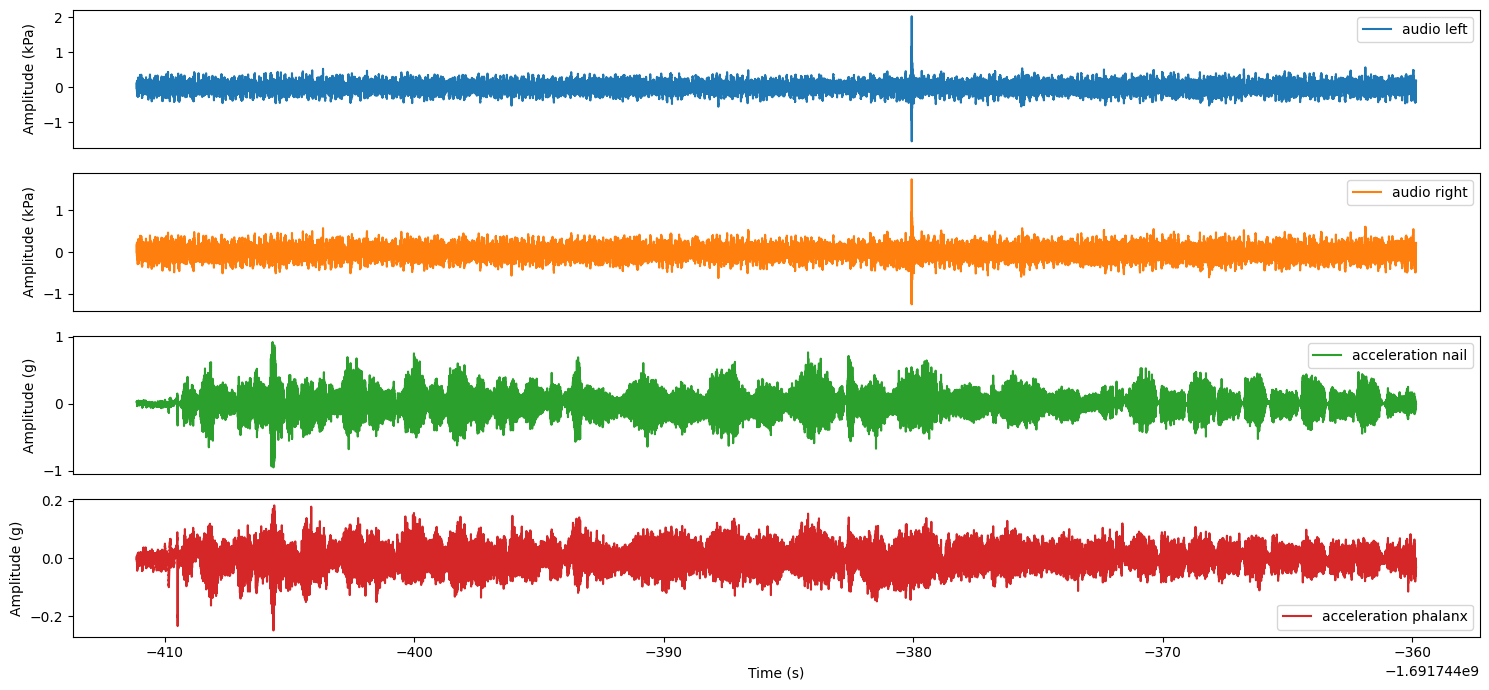

In [5]:
sources = ["audio","acceleration"]
pos = [ "left", "right", "nail", "phalanx"]
unit = ["kPa", "g"]
# Plot the kistler data
fig, axs = plt.subplots(4, 1, figsize=(15, 7))
for i in range(4):
    ax = axs[i]
    ax.plot(time_kistler, kistler_data[:, i], label=sources[i//2]+" "+pos[i], color="C"+str(i))
    ax.set_ylabel("Amplitude ("+unit[i//2]+")")
    ax.legend()

axs[0].set_xticks([])
axs[1].set_xticks([])
axs[2].set_xticks([])
axs[3].set_xlabel("Time (s)")
plt.tight_layout()

### Force/Torque

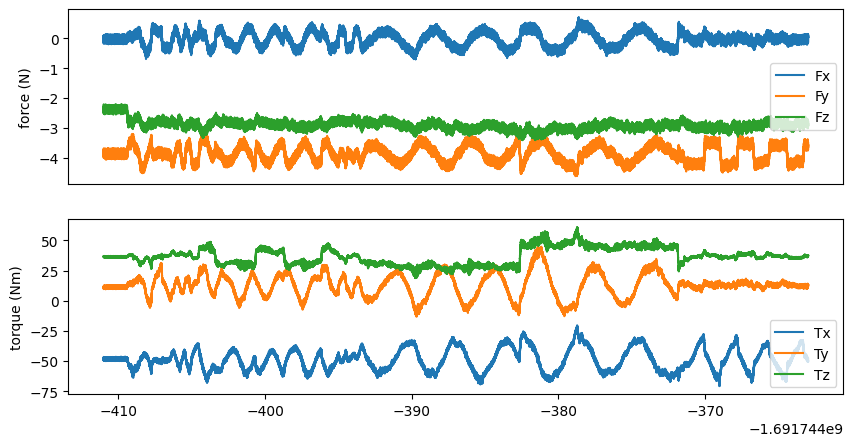

In [6]:
axis = ["Fx", "Fy", "Fz", "Tx", "Ty", "Tz"]
unit = ["N", "Nm"]
type = ["force", "torque"]

start_index = 41
end_index = 591504

fig, axs = plt.subplots(2, 1, figsize=(10, 5))
for i in range(6):
    ax = axs[i//3]
    ax.plot(time_ft_sensor[start_index:end_index], ft_sensor_data[start_index:end_index, i], label=axis[i])
    ax.set_ylabel(type[i//3] + " ("+unit[i//3]+")")
    ax.legend()
axs[0].set_xticks([])
axs[0].legend()


# Processed data

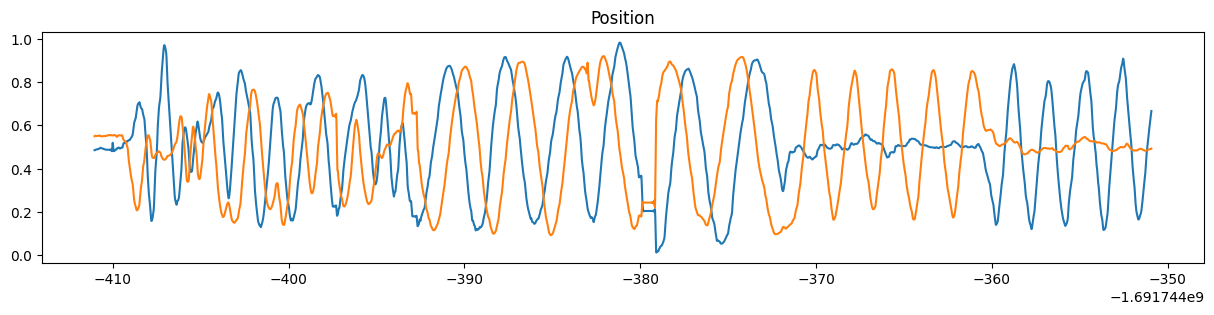

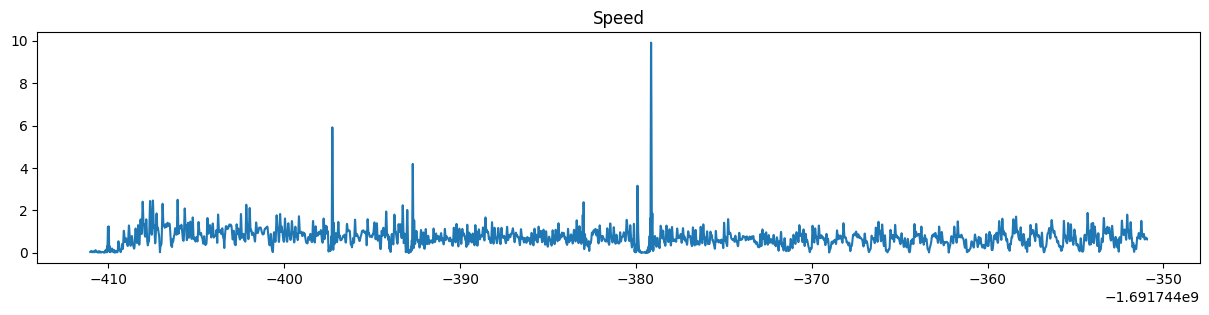

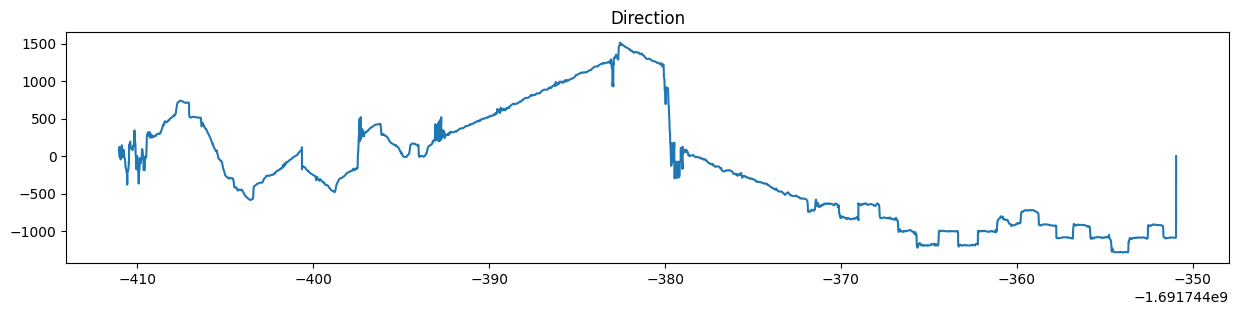

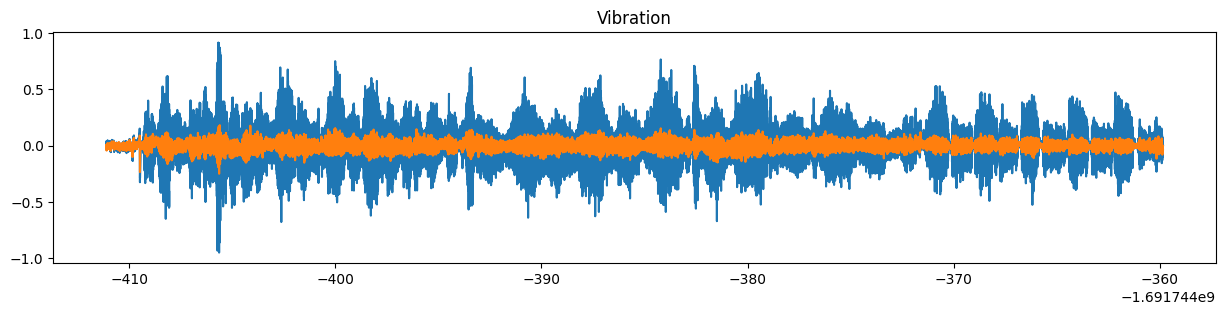

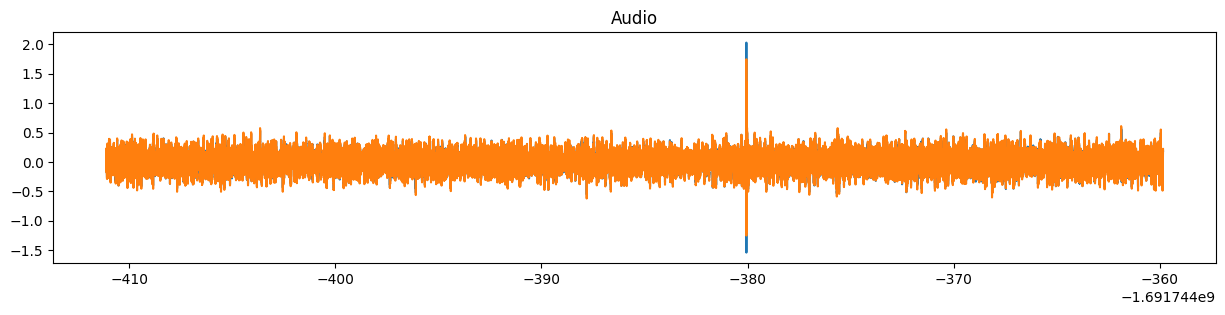

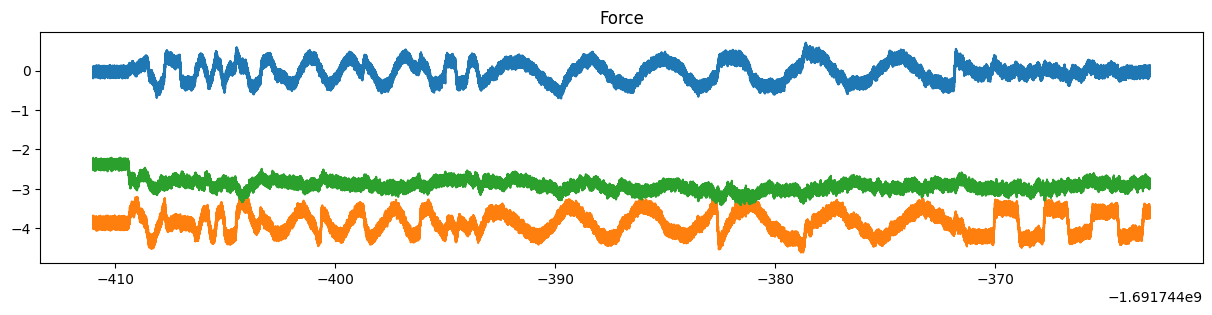

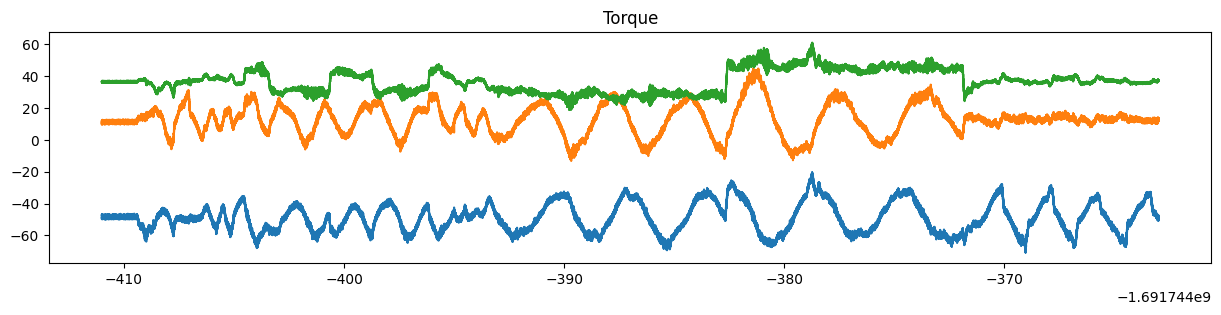

In [8]:
time_offset = -1691745000 # to avoid too large timestamps

data = HAV.importer.get_data(path, user, texture, trial, time_offset)
[time_kistler, kistler_data], [time_pos, pos_data], [time_ft_sensor, ft_sensor_data] = (
    data
)

#resample the data at a fixed rate and compute the speed and direction
[time_pos, pos, spd, dir] = HAV.importer.get_position_features(time_pos, pos_data)
#segment the data into audio and vibration
[time_audio,mic], [time_vibration,vib] = HAV.importer.get_kistler_features(time_kistler, kistler_data)
# segment the data into force and torque 
[time_force,force], [time_torque,torque] = HAV.importer.get_ft_sensor_features(time_ft_sensor, ft_sensor_data)


#store all data in lists
times = [time_pos, time_pos, time_pos, time_vibration, time_audio, time_force, time_torque]
datas = [pos, spd, dir, vib, mic, force, torque]
names = ["Position", "Speed", "Direction", "Vibration", "Audio", "Force", "Torque"]
y_labels = ["Position (dm)", "Speed (dm/s)", "Direction (degrees)", "Vibration (g)", "Audio (V)", "Force (N)", "Torque (Nm)"]

#plot all data in separate plots
for i in range(len(times)):
    plt.figure(figsize=(15, 3))
    plt.plot(times[i], datas[i])
    plt.title(names[i])
    plt.show()
    

# Alignmed data

Time:  (576392,)
Position:  (576392, 2)
Speed:  (576392,)
Direction:  (576392,)
Vibration:  (576392, 2)
Audio:  (576392, 2)
Force:  (576392, 3)
Torque:  (576392, 3)


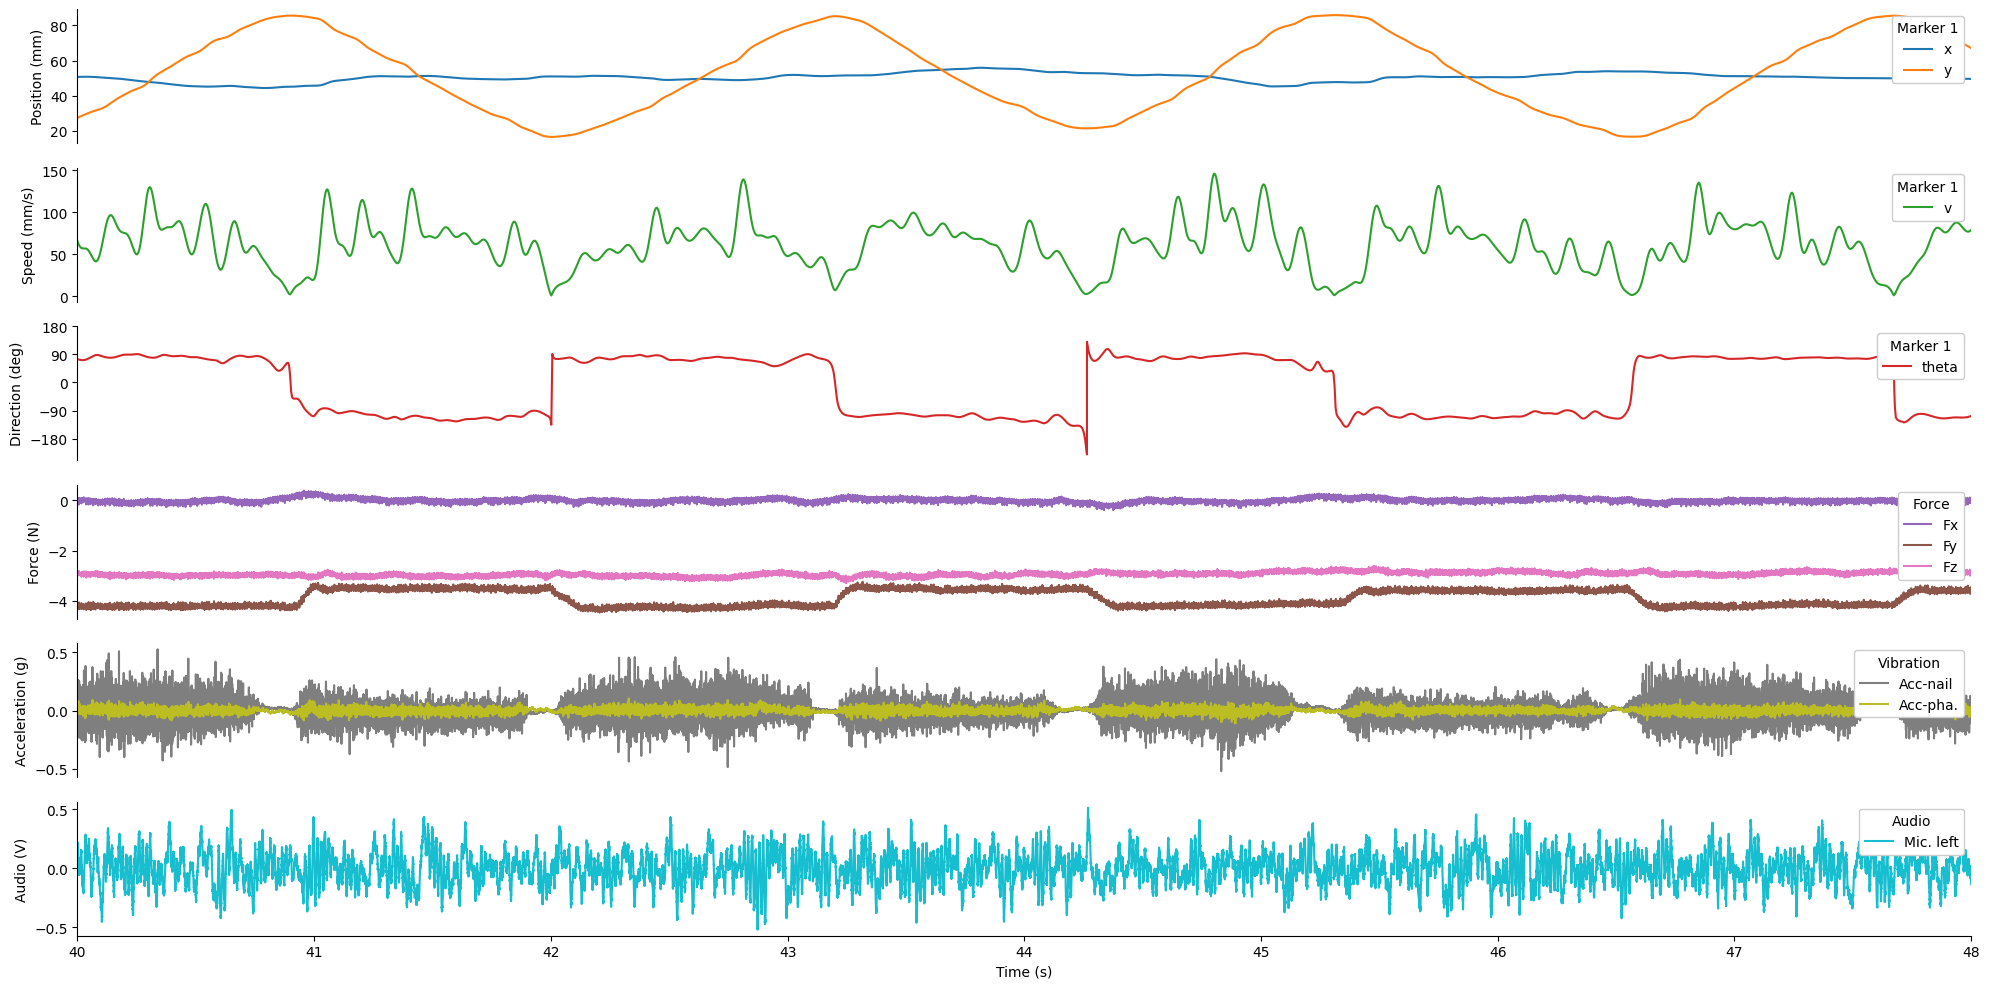

In [9]:
#load all data of a given trial, resample and align the timestamps of each data source
[time, position, speed, direction, vibration, audio, force, torque], [time_pos, pos, spd, dir] = HAV.importer.load_data(path, user, texture, trial, sampling_rate)

print("Time: ", time.shape)
print("Position: ", position.shape)
print("Speed: ", speed.shape)
print("Direction: ", direction.shape)
print("Vibration: ", vibration.shape)
print("Audio: ", audio.shape)
print("Force: ", force.shape)
print("Torque: ", torque.shape)

start_time = 40
end_time = 48
mask = (time > start_time) & (time < end_time)

color = plt.rcParams['axes.prop_cycle'].by_key()['color']

#create a subplot of 4x1
fig, axs = plt.subplots(6, 1, figsize=(20,10))
axs[0].plot(time[mask], position[mask][:,0]*100, label="x", color=color[0])
axs[0].plot(time[mask], position[mask][:,1]*100, label="y", color=color[1])
#add a legend
axs[0].legend(title="Marker 1", loc="upper right", framealpha=1)
#remove frame
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
#remove x axis ticks
axs[0].set_xticks([])
#y axis label
axs[0].set_ylabel("Position (mm)")
axs[0].set_xlim([start_time, end_time])

axs[1].plot(time[mask], speed[mask]*100, label="v", color=color[2])
axs[1].legend(title="Marker 1", loc="upper right", framealpha=1)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].set_xticks([])
axs[1].set_ylabel("Speed (mm/s)")
axs[1].set_xlim([start_time, end_time])

wrapped_dir = np.mod(direction[mask], 360)
wrapped_dir[wrapped_dir > 130] -= 360
axs[2].plot(time[mask], wrapped_dir, label="theta", color=color[3])
axs[2].legend(title="Marker 1", loc="upper right", framealpha=1)
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)
axs[2].set_xticks([])
#add y ticks
axs[2].set_yticks([-180, -90, 0, 90, 180])
axs[2].set_ylabel("Direction (deg)")
axs[2].set_xlim([start_time, end_time])

axs[3].plot(time[mask], force[mask,0], label="Fx", color=color[4])
axs[3].plot(time[mask], force[mask,1], label="Fy", color=color[5])
axs[3].plot(time[mask], force[mask,2], label="Fz", color=color[6])
axs[3].legend(title="Force", loc="upper right", framealpha=1)
axs[3].spines['top'].set_visible(False)
axs[3].spines['right'].set_visible(False)
axs[3].spines['bottom'].set_visible(False)
axs[3].set_xticks([])
axs[3].set_ylabel("Force (N)")
axs[3].set_xlim([start_time, end_time])

axs[4].plot(time[mask], vibration[mask,0], label="Acc-nail", color=color[7])
axs[4].plot(time[mask], vibration[mask,1], label="Acc-pha.", color=color[8])
axs[4].legend(title="Vibration", loc="upper right", framealpha=1)
axs[4].spines['top'].set_visible(False)
axs[4].spines['right'].set_visible(False)
axs[4].spines['bottom'].set_visible(False)
axs[4].set_xticks([])
axs[4].set_ylabel("Acceleration (g)")
axs[4].set_xlim([start_time, end_time])

axs[5].plot(time[mask], audio[mask,0], label="Mic. left", color=color[9])
#legend background alpha=1
axs[5].legend(title="Audio", loc="upper right", framealpha=1)
axs[5].spines['top'].set_visible(False)
axs[5].spines['right'].set_visible(False)
axs[5].set_ylabel("Audio (V)")
axs[5].set_xlabel("Time (s)")
#set x limit
axs[5].set_xlim([start_time, end_time])

plt.tight_layout()

#show the plot
plt.show()